# Introduction to Data Science
## Homework 3

Student Name: Nikita Amartya

Student Netid: nn899
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

Answer in separate attachment nn899_HW3_ans1.pdf

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [9]:
import pandas as pd
import numpy as np
from pandas import DataFrame
np.random.seed(42)
df = pd.read_csv('data/cell2cell_data.csv')
random_mask = np.random.rand(len(df)) < 0.8
train_df = df[random_mask]
test_df = df[~random_mask]

print len(train_df)
print len(test_df)

31938
7921


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

Answer: The test that we can run is take the mean of the sample. If mean of sample and the data are approximately same that means our data is sampled randomly.

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [10]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy")
columnList = [x for x in train_df.columns if x not in ('churndep')]

X_train = train_df[columnList].values
y_train = train_df["churndep"].values
dtc.fit(X_train, y_train)

X_test = test_df[columnList].values
y_test = test_df["churndep"].values



4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

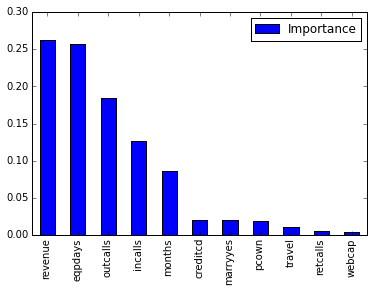

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

f_importance = DataFrame(dtc.feature_importances_, columns = ["Importance"],
                         index = columnList).sort(['Importance'], ascending = False)
plt.figure() 
f_importance.plot(kind='bar');

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [20]:
# Code/answer here

rel = ['revenue', 'eqpdays', 'outcalls', 'churndep']
df_rel = train_df[rel]
df_rel.corr()

# I have sorted the featues before plotting the bar graph. As we can see, the The 3 top most features are revenue, 
# eqpdays and outcalls. The relationship between these 4 columns with each other is as
# obtained in the output from code above. The highest corraltion is between churndep and eqpdays. The longer a person 
# has been using a cellular equipment, the more likely he is to stay. Higher is the value of outcall, more is the 
# revenue (this is a common knowledge). Relationship (eqpdays vs revenue), (revenue vs churndep),
# (eqpdays vs outcalls), (outcalls vs churndep) is negative. Other relations are positive. One inference that we can
# draw from (revenue vs churndep) being negative is that if the revenue is higher means customer is paying more per 
# month and using the service more and less likely to leave. Same with (outcalls vs churndep). 
# eqpdays vs churndep is positive but its a low value which implies that likelihood of an older customer to leave is 
# low but positive. This is because person with older equipment is likely to get a new equpment and 
# that is good chance for one to look for alternate services. Outcalls vs eqpdays being negative means a customer 
# with new equipment makes more number of calls vice versa. Older equipment means smaller number of calls and hence 
# smaller revenue.

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.222364,0.500795,-0.008988
eqpdays,-0.222364,1.000000,-0.243465,0.114607
outcalls,0.500795,-0.243465,1.000000,-0.036827
churndep,-0.008988,0.114607,-0.036827,1.000000


6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

In [13]:
from sklearn import metrics 
print metrics.accuracy_score(dtc.predict(X_train), y_train)
print metrics.accuracy_score(dtc.predict(X_test), y_test)


0.999812136014
0.533266001767


### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

In [14]:
# Code here
import random
np.random.seed(13)
gen_split_values = random.sample(range(2,999),10)
gen_leaf_values = random.sample(range(1,999),10)
min_samples_split_values = sorted(gen_split_values)
min_samples_leaf_values = sorted(gen_leaf_values)
print min_samples_split_values
print min_samples_leaf_values

[362, 367, 541, 612, 765, 782, 793, 933, 961, 967]
[236, 241, 373, 522, 525, 529, 620, 750, 824, 918]


2\. Explain in words your reasoning for choosing the above ranges.

Answer: The range for min_samples_split_values is from 2 because the minimum number of samples required to split an internal node is 2. The range for min_samples_leaf_values is from 1 because minimum number of samples required to be at a leaf node. The upper limit for the range is 999 because if we take the min_sample_split and min_samples_leaf value too high then, we are not getting better accuracy (and also most of the lines in the graph are overlapping and we don't see much variation in accuracy)

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

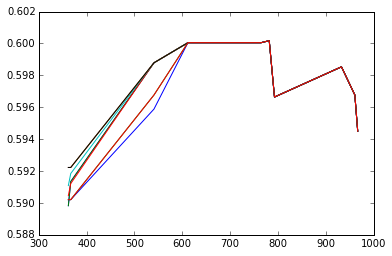

Maximum Accuracy is :
0.60017674536
Best split :
362
Best leaf :
529


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
x = min_samples_split_values
max_accuracy = 0
best_split = 0
best_leaf = 0
for split in range(len(min_samples_split_values)):
    
    accuracy = []
    
    for leaf in range(len(min_samples_leaf_values)):
        
        decision_tree = DecisionTreeClassifier(criterion="entropy",min_samples_split= min_samples_split_values[split] ,min_samples_leaf= min_samples_leaf_values[leaf] )
        decision_tree.fit(X_train, y_train)
        accuracy.append(metrics.accuracy_score(decision_tree.predict(X_test), y_test))
        acc = metrics.accuracy_score(decision_tree.predict(X_test), y_test)
        if acc > max_accuracy :
            max_accuracy = acc
            best_split = min_samples_split_values[split]
            best_leaf = min_samples_leaf_values[leaf]
        
    plt.plot(x, accuracy)    

plt.show()
print "Maximum Accuracy is :"
print max_accuracy
print "Best split :"
print best_split
print "Best leaf :"
print best_leaf


4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [16]:
# As we can see from the output above, Maximum Accuracy is : 0.60017674536
# For Best split value: 362, Best leaf value: 529

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

ANSWER:
The churn production model can help predict if a customer is going to churn. If we  can predict it with high accuracy, we can target such customer with some promotions and special benefits such that the customer stays. Promotional offer or added benefits is a good way to make a customer stay and increase the revenue. We can clearly use the results in 2.5 to decide our marketing strategy to maximize revenue.